| x | y |
| :-: | :-: |
| 0.5 | 10.4 |
| 1 | 5.8 |
| 2 | 3.3 |
| 3 | 2.4 |
| 4 | 2 |

The data from the table can be modelled using the formula:
$ y = (\dfrac{a + \sqrt x}{bx})^2 $

Linearize the model using an adequate transformation.

Determine the values of $ a $ and $ b $ using the least squares method.

Calculate the value of $ y $ when $ x = 1.6 $.

Visualize.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from sympy import symbols, diff, Eq, solve

In [2]:
nodes = np.array([0.5, 1, 2, 3, 4])
values = np.array([10.4, 5.8, 3.3, 2.4, 2])

Let $ n $ be the the length of the given table.

$ y = (\dfrac{a + \sqrt x}{bx})^2 $

$ \iff $

$ y_i = (\dfrac{a + \sqrt x_i}{bx_i})^2 \space $ for $ i = 1, 2, ..., n $

$ \sqrt y_i = \dfrac{a + \sqrt x_i}{bx_i} \space $ for $ i = 1, 2, ..., n $

$ \sqrt y_i = \dfrac{a}{bx_i} + \dfrac{\sqrt x_i}{bx_i} \space $ for $ i = 1, 2, ..., n $

$ \sqrt y_i = \dfrac{a}{b} \dfrac{1}{x_i} + \dfrac{1}{b} \dfrac{\sqrt x_i}{x_i} \space $ for $ i = 1, 2, ..., n $

$ \sqrt y_i = \dfrac{a}{b} \dfrac{1}{x_i} + \dfrac{1}{b} \dfrac{1}{\sqrt x_i} \space $ for $ i = 1, 2, ..., n $

Let $ A = a/b $ and $ B = 1/b $

$ \sqrt y_i = A \dfrac{1}{x_i} + B \dfrac{1}{\sqrt x_i} \space $ for $ i = 1, 2, ..., n $

Note that in the equation above $ x_i $ and $ y_i $ are data from the table and thus are known values.
The variables are $ A $ and $ B $.

Let's define $ \phi(A, B) = \displaystyle\sum_{i = 1}^{n}(A \dfrac{1}{x_i} + B \dfrac{1}{\sqrt x_i} - \sqrt y_i)^2 $

We want to minimize $ \phi $ and for that we will solve:

$
\begin{cases}
    \phi'_A(A, B) = 0 \\
    \phi'_B(A, B) = 0
\end{cases}
$

In [3]:
def y(a, b, x):
    return ((a + np.sqrt(x)) / (b * x)) ** 2

def f(A, B, x):
    return A * (1 / x) + B * (1 / np.sqrt(x))

def phi(A, B):
    return sum((f(A, B, nodes[i]) - np.sqrt(values[i])) ** 2 for i in range(nodes.size))

In [4]:
A, B = symbols('A, B')

equations = [
    Eq(diff(phi(A, B), A), 0),
    Eq(diff(phi(A, B), B), 0)
]

solutions = solve(equations)

A = sol[A]
B = sol[B]

b = 1 / B
a = b * A

print('a is', a, 'and b is:', b)

NameError: name 'sol' is not defined

>Note that $ A $ and $ B $ are initially declared as symbols and then reassigned to float numbers.

In [ ]:
x_target = 1.6

value_of_x_target = y(a, b, x_target)

value_of_x_target

4.10414260315480

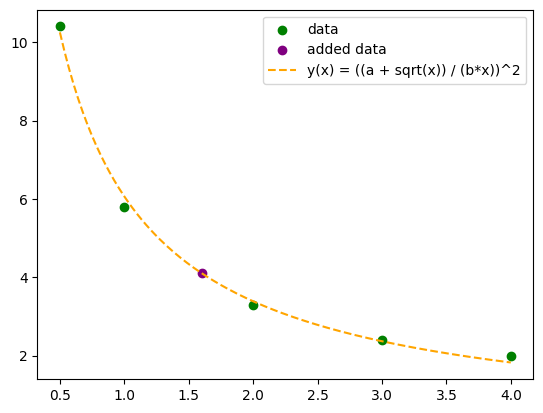

In [ ]:
x_axis = np.linspace(nodes.min(), nodes.max(), 200)

plt.scatter(nodes, values, color='green')
plt.scatter([x_target], [value_of_x_target], color='purple')
plt.plot(x_axis, y(a, b, x_axis), color='orange', linestyle='dashed')
plt.legend(['data', 'added data', '$y(x) = ((a + \sqrt(x)) / (b*x))^2$'])
plt.show()